.ipynb settings

In [39]:
#Settings relative to .ipynb file format that have to be executed here

#Make reloading of modules automatic et évite d'avoir à redémarer le kernel et tout re executer pour appliquer la modification d'un module dans __main__.
%load_ext autoreload  
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
#src.useful_functions
import sys
sys.path.append('../src')  # Adjust the path to import modules in src/

import useful_functions

Importation of the dataset(s) and pipeline(s)

In [41]:
#Importing dataset(s)
from data import make_dataset
from pipeline import model


#Load the big datase
feat_engineered_ds = make_dataset.load_data(True, 'interim/feat_engineered_ds')

#Load the train and test datasets:
X_train_00   = make_dataset.load_data(False, 'processed/split/X_train_00')
Y_train_00   = make_dataset.load_data(False, 'processed/split/Y_train_00')
X_test_00   = make_dataset.load_data(False, 'processed/split/X_test_00')
X_test_info_00 = make_dataset.load_data(False, 'processed/split/X_test_info')
Y_test_00   = make_dataset.load_data(False, 'processed/split/Y_test_00')

#Load the not_split train and test datasets:
X   = make_dataset.load_data(False, 'processed/not_split/X')
Y   = make_dataset.load_data(False, 'processed/not_split/Y')
X_info = make_dataset.load_data(False, 'processed/not_split/X_info')

#Load the train lists names
H_A_col_to_concat = make_dataset.load_string_list("H_A_col_to_concat")
names_col_concatenated = make_dataset.load_string_list("names_col_concatenated")
contextual_col = make_dataset.load_string_list("contextual_col")
col_to_remove = make_dataset.load_string_list("col_to_remove")

#Import the trained pipeline
chosen_pipeline_trained = model.load_pipeline("chosen_pipeline_trained")
chosen_pipeline = model.load_pipeline("chosen_pipeline")


print(X.columns)
print(Y.columns)
print(X_info.columns)

The interim/feat_engineered_ds dataframe contains matchs of the seasons:  [2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


Successfully loaded the list: H_A_col_to_concat
Successfully loaded the list: names_col_concatenated
Successfully loaded the list: contextual_col
Successfully loaded the list: col_to_remove
Successfully loaded the pipeline: chosen_pipeline_trained


Successfully loaded the pipeline: chosen_pipeline


Index(['Diff_Avg_points_pm_ponderated_by_adversary_perf', 'Diff_Avg_goal_diff',
       'Diff_Avg_scored_g_conceeded_g_ratio', 'Diff_Avg_collected_points',
       'Diff_Annual_budget', 'Diff_Points_5lm', 'Diff_Goal_Diff_5lm',
       'Diff_Week_ranking_5lm', 'Diff_avg_corners_nb', 'Diff_Avg_shots_nb',
       'Diff_Avg_shots_on_target_nb', 'Diff_Avg_fouls_nb',
       'Diff_Avg_possession', 'Diff_Avg_xg', 'H_A_status', 'Season_year'],
      dtype='object')
Index(['Result'], dtype='object')
Index(['Team_we_pred_vict_proba', 'Adversary', 'Game Week', 'Date',
       'Pla

# VII) <u> Pipeline results study

<span style="color:#FF1493;"> <strong> <font size="4">1) Probabilities calibration and distribution study

c:\Users\polol\OneDrive\Documents\ML\Projet Mbappe (11.23- )\Projet Mbappe Cookiestructure\notebooks\../src\pipeline\results.py:496: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  X_info_pred = pd.concat([X_info_pred, X_test_info_for_this_seas], ignore_index=True, axis=0)


Successfully loaded the datasets: pipeline_pred_proba_and_Y_and_X_info


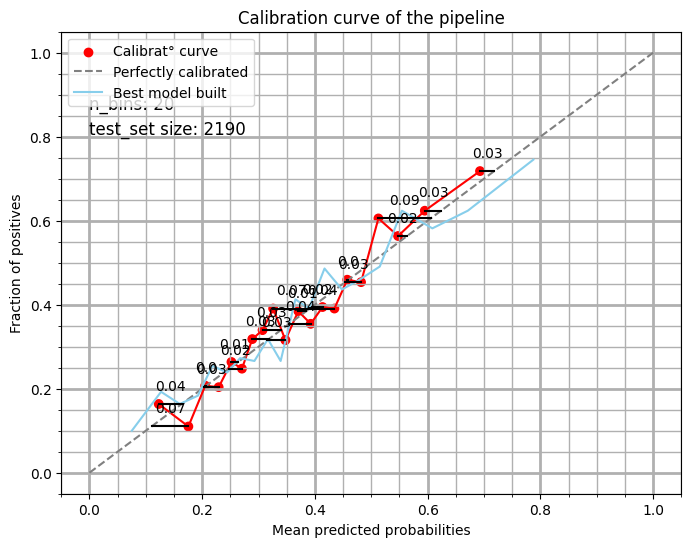

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.02, 0.16]   │                         110 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.16, 0.19]   │                         109 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.19, 0.22]   │                         111 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.22, 0.24]   │                         108 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.24, 0.26]   │                         110 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.26, 0.28]   │                         109 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.28, 0.3]    │                         110 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.3, 0.32]    │                 

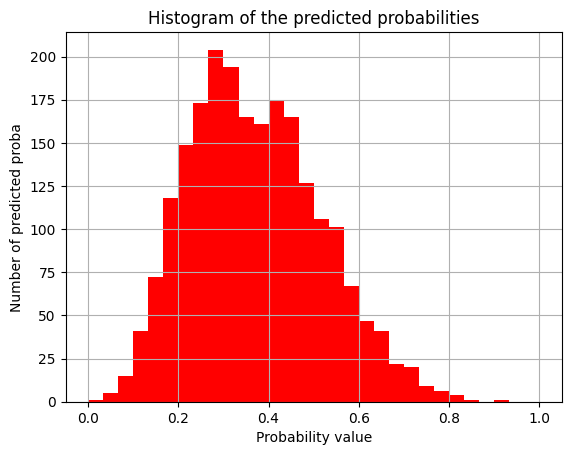

In [42]:
#src.pipeline.results
from pipeline import results
from sklearn.base import clone
from dvclive import Live
from sklearn.metrics import accuracy_score




test_seasons = [2021,2022,2023,2024]

#Make proba predictions retraining the pipeline at every Game Week or every Season:
proba_pred_GW_training, Y_test_00_GW_training, X_info_GW_training = results.proba_prediction_retrained_each_seas(X, Y, X_info, clone(chosen_pipeline), 'season', test_seasons)



#Make 'normal' proba predictions on the test_seasons (defined in V)1) )
normal_proba_pred = chosen_pipeline_trained.predict_proba(X_test_00)[:,1]



# We choose wether we plot the graphs on GW training simulations or on 'normal' training simulations
Y_test_01 = Y_test_00_GW_training
X_test_info_01 = X_info_GW_training

proba_pred = proba_pred_GW_training



#Plot Calibration curve of the pipeline and info about its bins
prob_pred_01, prob_true_01 = results.plot_calibration_curve_2(
                                Y_test_0 = Y_test_01.copy(),
                                X_train_0 = X_test_info_01.copy(),
                                proba_pred_0 = proba_pred.copy(),
                                n_bins_0 = 20,
                                strategy_0 = 'quantile',
                                color_0 = 'red',
                                GW_training_or_not = True)

#We display statistics on the pipeline probabilities deviation 
results.print_calibration_stats(prob_pred_01.copy(),
                                prob_true_01.copy(),
                                'non calibrated')

#We plot the histogram of the proba predicted by the non calibrated pipeline
results.plot_histo_predicted_proba(proba_pred.copy(), 30, 'r', 'predicted probabilities')

# Display the ratio (probabilities pred/nb of true targets)
results.ratio_proba__sum_true_target(X_train_00.copy(), Y_train_00.copy(), X_test_00.copy(), Y_test_00.copy(), chosen_pipeline_trained)


<span style="color:#FF1493;"> <strong> <font size="4">2) Save the predicted probabilities and the corresponding results and contextual info

In [43]:
 # results.save_pred_proba(proba_pred, Y_test_01, X_test_info_01, "pipeline_pred_proba_and_Y_and_X_info")

<span style="color:#FF1493;"> <strong> <font size="4">3) Probabilities calibration and distribution study depending on different parameters

Calibration curve of proba predicted on matches where Played_matches_nb C [ 6 , 21 ]
Successfully loaded the datasets: pipeline_pred_proba_and_Y_and_X_info


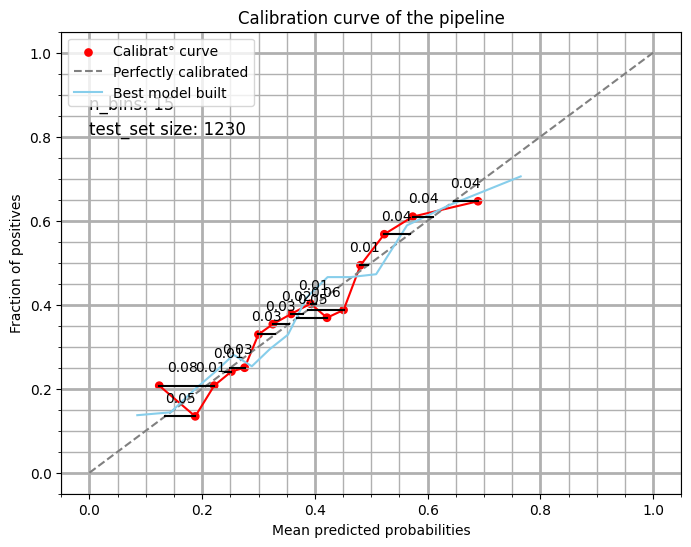

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.02, 0.17]   │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.17, 0.2]    │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.2, 0.24]    │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.24, 0.26]   │                          83 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.26, 0.29]   │                          84 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.29, 0.31]   │                          79 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.31, 0.34]   │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.34, 0.38]   │                 

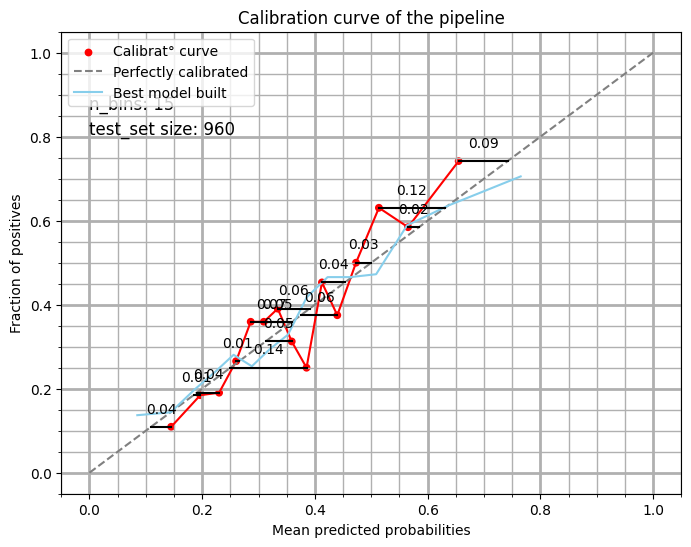

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.08, 0.17]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.17, 0.21]   │                          65 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.21, 0.24]   │                          63 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.24, 0.27]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.27, 0.3]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.3, 0.32]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.32, 0.35]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.35, 0.37]   │                 

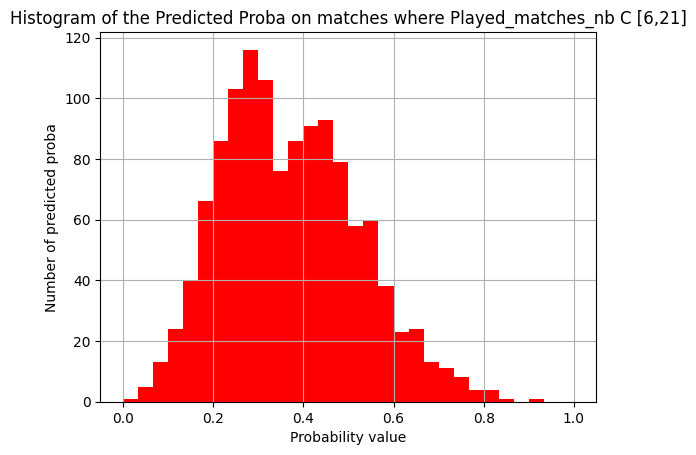

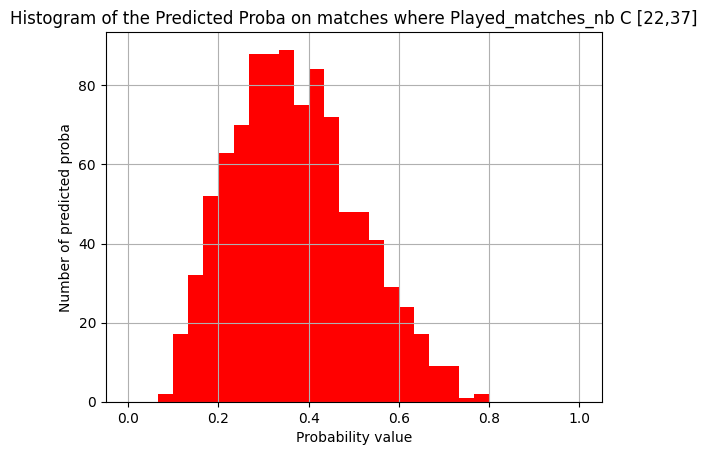

In [44]:
#src.pipeline.analysis

from pipeline import analysis
# We divide the dataframe in n subdataframes classified following the nb of played matches
subdatasets = analysis.calibration_over_season_advancement(2, X_info_GW_training, proba_pred_GW_training, Y_test_00_GW_training)

#Plot Calibration curves for each of these dataframes
results.calibration_curves_subdataframes(subdatasets, 15, 30, True)



<span style="color:#FF1493;"> <strong> <font size="4">4) Model coefficients study

In [45]:
#src.pipeline.results
results.features_coeff_report(chosen_pipeline_trained, X_train_00)

[[0.65513748]]
╒════════════════════╤═══════════════╕
│ Feature            │   Coefficient │
╞════════════════════╪═══════════════╡
│ Diff_Goal_Diff_5lm │      0.655137 │
╘════════════════════╧═══════════════╛


# VIII) <u> Learning curves

<span style="color:#FF1493;"> <strong> <font size="4">1) Pipeline learning curve

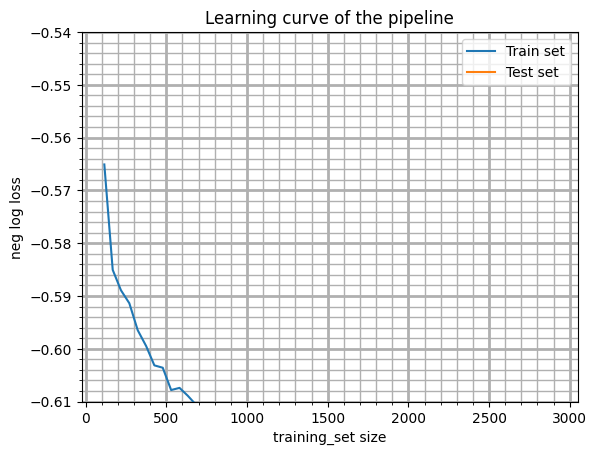

In [46]:
#src.visualization.learning_curves

from visualization import learning_curves

# Plot learning curves for our pipeline
learning_curves.pipeline_learning_curve(X_train_00.copy(),
                                        Y_train_00.copy(),
                                        chosen_pipeline,
                                        'neg_log_loss')